In [1]:
import pandas as pd

def get_csv_labels(file_name):
    try:

        df = pd.read_csv(file_name)
        labels = df.columns.tolist()
        return labels
    except Exception as e:
        return str(e)


file_name = '5min_smoothed_data/ICARE_0004.csv'
labels = get_csv_labels(file_name)
print(labels)
print(len(labels))

['BCI', 'BSAR', 'SIQ', 'SIQ_alpha', 'SIQ_beta', 'SIQ_delta', 'SIQ_theta', 'SignalSD', 'alphakurtosis', 'alphameanrat', 'alphaminrat', 'alphapctrat', 'alphastdrat', 'avgspectent', 'avgspectkurt', 'betakurtosis', 'betameanrat', 'betaminrat', 'betapctrat', 'betastdrat', 'corrmean', 'd0MaxAmp', 'd0MaxMaxFourAmp', 'd0MeanMaxAmp', 'd0MeanMaxFourAmp', 'd0MeanVarAmp', 'd0VarMaxAmp', 'd0VarMaxFourAmp', 'd0VarMeanAmp', 'd0VarVarAmp', 'd1MaxAmp', 'd1MaxMaxFourAmp', 'd1MeanMaxAmp', 'd1MeanMaxFourAmp', 'd1MeanVarAmp', 'd1VarMaxAmp', 'd1VarMaxFourAmp', 'd1VarMeanAmp', 'd1VarVarAmp', 'd2MaxAmp', 'd2MaxMaxFourAmp', 'd2MeanMaxAmp', 'd2MeanMaxFourAmp', 'd2MeanVarAmp', 'd2VarMaxAmp', 'd2VarMaxFourAmp', 'd2VarMeanAmp', 'd2VarVarAmp', 'deltaalphamean', 'deltaalphamin', 'deltaalphapct', 'deltaalphastd', 'deltakurtosis', 'deltameanrat', 'deltaminrat', 'deltapctrat', 'deltastdrat', 'deltathetamean', 'deltathetamin', 'deltathetapct', 'deltathetastd', 'geomeanamp', 'harmmeanamp', 'kurtavg', 'linelengthmean', 'l

In [6]:
import os

folder_path = '5min_smoothed_data/'

# 统计文件夹中 CSV 文件的数量
num_files = len([f for f in os.listdir(folder_path) if f.endswith('.csv')])
print(f"文件夹中的 CSV 文件数量: {num_files}")

文件夹中的 CSV 文件数量: 540


In [7]:
import os
import pandas as pd

# 文件夹路径
folder_path = '5min_smoothed_data/'
outcome_file = 'ICARE_GPD_finalAbstractDataset_outcome_binary.csv'

# 读取 outcome 文件
outcome_data = pd.read_csv(outcome_file)

# 获取 outcome_data 中的所有 pat_ID
outcome_pat_ids = outcome_data['pat_ID'].unique()

# 初始化存在于 outcome_data 中和不存在的文件列表
files_with_outcome = []
files_without_outcome = []

# 遍历文件夹中的每个 CSV 文件
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        patient_id = filename.split('.')[0]  # 提取患者 ID（文件名）
        
        # 检查该 patient_id 是否在 outcome_data 中
        if patient_id in outcome_pat_ids:
            files_with_outcome.append(patient_id)
        else:
            files_without_outcome.append(patient_id)

# 输出结果
print(f"存在于 outcome_data 中的文件数: {len(files_with_outcome)}")
print(f"不存在于 outcome_data 中的文件数: {len(files_without_outcome)}")
#print(f"不存在于 outcome_data 中的文件名: {files_without_outcome}")

# 额外：你可以检查 outcome 中有但没有 CSV 文件的 pat_ID
outcome_only_pat_ids = [pat_id for pat_id in outcome_pat_ids if pat_id not in files_with_outcome]
#print(f"outcome 文件中有，但没有对应 CSV 文件的 pat_ID: {outcome_only_pat_ids}")

存在于 outcome_data 中的文件数: 298
不存在于 outcome_data 中的文件数: 242


In [8]:
import os
import pandas as pd

# 获取有 outcome 的 pat_ID 列表
valid_patients = files_with_outcome

# 筛选 outcome_data 中的 valid_patients
valid_outcome_data = outcome_data[outcome_data['pat_ID'].isin(valid_patients)]

# 去除重复的行，仅保留每个 pat_ID 和 outcome 的唯一组合
valid_outcome_data = valid_outcome_data.drop_duplicates(subset=['pat_ID', 'outcome'])

# 保存去重后的有效患者和 outcome 信息为 CSV 文件
valid_outcome_data.to_csv('valid_patients_outcome.csv', index=False)

print("已将去重后的有效患者和 outcome 信息保存为 valid_patients_outcome.csv 文件。")

# 统计 bad outcome 和 good outcome 的数量
bad_outcome_count = valid_outcome_data[valid_outcome_data['outcome'] == 'Bad Outcome'].shape[0]
good_outcome_count = valid_outcome_data[valid_outcome_data['outcome'] == 'Good Outcome'].shape[0]

print(f"Bad Outcome 的数量: {bad_outcome_count}")
print(f"Good Outcome 的数量: {good_outcome_count}")

已将去重后的有效患者和 outcome 信息保存为 valid_patients_outcome.csv 文件。
Bad Outcome 的数量: 246
Good Outcome 的数量: 52


In [9]:
import os
import pandas as pd

# 读取 valid_patients_outcome.csv 文件
valid_outcome_data = pd.read_csv('valid_patients_outcome.csv')

# 获取 valid_patients 中的 pat_ID
valid_patients = valid_outcome_data['pat_ID'].unique()

# 文件夹路径
folder_path = '5min_smoothed_data/'

# 初始化一个列表，用于存储每个病人的时长信息
patient_durations = []

# 采样率 (每秒2次，即2Hz)
sampling_rate = 2  # 2Hz，即每秒2次

# 遍历文件夹中的每个 CSV 文件
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        patient_id = filename.split('.')[0]  # 提取患者 ID
        
        # 仅处理 valid_patients 中的病人
        if patient_id in valid_patients:
            # 读取 EEG 数据
            file_path = os.path.join(folder_path, filename)
            eeg_data = pd.read_csv(file_path)
            
            # 计算记录的总时长（秒）
            num_rows = eeg_data.shape[0]
            duration_seconds = num_rows / sampling_rate
            
            # 将病人的时长信息存储到列表中
            patient_durations.append({
                'pat_ID': patient_id,
                'num_rows': num_rows,
                'duration_seconds': duration_seconds,
                'duration_minutes': duration_seconds / 60  # 转换为分钟
            })

# 将时长信息转换为 DataFrame 进行展示
duration_df = pd.DataFrame(patient_durations)

# 输出每个病人的时长信息
print(duration_df)

# 保存为 CSV 文件
duration_df.to_csv('valid_patient_record_durations.csv', index=False)


# 计算平均时长和标准差
average_duration_minutes = duration_df['duration_minutes'].mean()
std_duration_minutes = duration_df['duration_minutes'].std()

# 输出平均时长和标准差（分钟）
print(f"所有患者的平均时长（分钟）：{average_duration_minutes}")
print(f"时长的标准差（分钟）：{std_duration_minutes}")

# 计算最大和最小时长
max_duration_minutes = duration_df['duration_minutes'].max()
min_duration_minutes = duration_df['duration_minutes'].min()

# 输出最大和最小时长
print(f"最长时长（分钟）：{max_duration_minutes}")
print(f"最短时长（分钟）：{min_duration_minutes}")

         pat_ID  num_rows  duration_seconds  duration_minutes
0    ICARE_0369       113              56.5          0.941667
1    ICARE_0396       494             247.0          4.116667
2    ICARE_0625       236             118.0          1.966667
3    ICARE_0631       159              79.5          1.325000
4    ICARE_0157       363             181.5          3.025000
..          ...       ...               ...               ...
293  ICARE_0774       281             140.5          2.341667
294  ICARE_0748        53              26.5          0.441667
295  ICARE_0833       200             100.0          1.666667
296  ICARE_0600       466             233.0          3.883333
297  ICARE_0402       315             157.5          2.625000

[298 rows x 4 columns]
所有患者的平均时长（分钟）：2.4096476510067117
时长的标准差（分钟）：1.9723384982113112
最长时长（分钟）：9.491666666666667
最短时长（分钟）：0.008333333333333333


In [10]:
# 计算好结果（Good Outcome）和坏结果（Bad Outcome）的时长统计信息

# 分别筛选出好结果和坏结果的患者时长数据
good_outcome_patients = valid_outcome_data[valid_outcome_data['outcome'] == 'Good Outcome']['pat_ID'].unique()
bad_outcome_patients = valid_outcome_data[valid_outcome_data['outcome'] == 'Bad Outcome']['pat_ID'].unique()

# 计算好结果患者的时长信息
good_outcome_durations = duration_df[duration_df['pat_ID'].isin(good_outcome_patients)]
average_good_duration = good_outcome_durations['duration_minutes'].mean()
std_good_duration = good_outcome_durations['duration_minutes'].std()

# 计算坏结果患者的时长信息
bad_outcome_durations = duration_df[duration_df['pat_ID'].isin(bad_outcome_patients)]
average_bad_duration = bad_outcome_durations['duration_minutes'].mean()
std_bad_duration = bad_outcome_durations['duration_minutes'].std()

# 输出好结果和坏结果的平均时长及标准差
print(f"好结果患者的平均时长（分钟）：{average_good_duration}")
print(f"好结果患者的时长标准差（分钟）：{std_good_duration}")

print(f"坏结果患者的平均时长（分钟）：{average_bad_duration}")
print(f"坏结果患者的时长标准差（分钟）：{std_bad_duration}")

好结果患者的平均时长（分钟）：1.453044871794872
好结果患者的时长标准差（分钟）：1.3174875707331613
坏结果患者的平均时长（分钟）：2.6118563685636866
坏结果患者的时长标准差（分钟）：2.0295749831904173


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torch as torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import r2_score

if torch.cuda.is_available():    
    device = "cuda:0"
else:
    device = "cpu"
print(device)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch.optim as optim

cpu


In [20]:
initial_channels = 128
class CNNEncoder(nn.Module):
    def __init__(self, latent_dim):
        super(CNNEncoder, self).__init__()
        self.latent_dim = latent_dim

        # 修改输入通道数为 8（即每个时间步的特征数量）
        layers = [
            nn.Conv1d(1, initial_channels, kernel_size=3, stride=1, padding=1),  # 改为8
            nn.LeakyReLU()
        ]

        in_channels = initial_channels
        for i in range(3):  # 3 more layers to make 4 in total
            out_channels = in_channels // 2
            layers.extend([
                nn.Conv1d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
                nn.LeakyReLU()
            ])
            in_channels = out_channels

        self.encoder = nn.Sequential(*layers)
        self.fc_mean = nn.Linear(in_channels * seq_length, latent_dim)
        self.fc_logvar = nn.Linear(in_channels * seq_length, latent_dim)

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)
        mean = self.fc_mean(x)
        logvar = self.fc_logvar(x)
        return mean, logvar

class CNNDecoder(nn.Module):
    def __init__(self, latent_dim):
        super(CNNDecoder, self).__init__()
        self.latent_dim = latent_dim
        self.fc = nn.Linear(latent_dim, initial_channels // 8 * seq_length)  # Match the output channel of the encoder

        layers = [nn.LeakyReLU()]
        in_channels = initial_channels // 8
        for i in range(3):
            out_channels = in_channels * 2
            layers.extend([
                nn.ConvTranspose1d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
                nn.LeakyReLU()
            ])
            in_channels = out_channels
        
        # Remove the last LeakyReLU and add a final ConvTranspose to match the Encoder's starting channel
        layers.pop()
        layers.append(nn.ConvTranspose1d(in_channels, 1, kernel_size=3, stride=1, padding=1))

        self.decoder = nn.Sequential(*layers)

    def forward(self, z):
        x = self.fc(z)
        x = x.view(x.size(0), initial_channels // 8, seq_length)
        x = self.decoder(x)
        return F.leaky_relu(x)


class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = CNNEncoder(latent_dim)
        self.decoder = CNNDecoder(latent_dim)

    def reparameterize(self, mean, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mean + eps * std

    def forward(self, x):
        mean, logvar = self.encoder(x)
        z = self.reparameterize(mean, logvar)
        reconstruction = self.decoder(z)
        return reconstruction, mean, logvar
    
    def get_embedding(self, x):
        self.eval()
        with torch.no_grad():
            mean, logvar = self.encoder(x)
            z = self.reparameterize(mean, logvar)
        return z

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def train(model, dataloader, optimizer, criterion, alpha):
    model.train()
    running_loss = 0
    for data, labels in dataloader:  # 拆分数据和标签
        data = data.to(device)  # 将数据移动到设备上
        labels = labels.to(device)  # 如果需要，可以将标签也移动到设备上

        optimizer.zero_grad()

        reconstruction, mean, logvar = model(data)  # 前向传播
        recon_loss = criterion(reconstruction, data)
        kl_loss = -0.5 * torch.mean(1 + logvar - mean.pow(2) - logvar.exp())
        loss = recon_loss + alpha * kl_loss

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * data.size(0)
        
    epoch_loss = running_loss / len(dataloader.dataset)
    return epoch_loss

def test(model, dataloader, criterion):
    model.eval()
    running_loss = 0
    with torch.no_grad():
        for data in dataloader:
            data = data.to(device)
            reconstruction, _, _ = model(data)
            loss = criterion(reconstruction, data)

            running_loss += loss.item() * data.size(0)
    
    epoch_loss = running_loss / len(dataloader.dataset)
    return epoch_loss

def get_latent_variables(model, dataloader):
    model.eval()  # 切换到评估模式
    all_latent_vars = []

    with torch.no_grad():  # 禁用梯度计算以加速和节省内存
        for data, _ in dataloader:  # 获取输入数据，忽略标签
            data = data.to(device)  # 将数据移动到正确的设备
            mean, logvar = model.encoder(data)  # 只获取编码器的输出
            z = model.reparameterize(mean, logvar)  # 获取潜在变量 z
            all_latent_vars.append(z.detach().cpu())  # 将结果移动到 CPU 并存储

    return torch.cat(all_latent_vars)  # 拼接所有批次的潜在变量

In [21]:
import os
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset

# 设置采样率（每秒2次，即2Hz）和序列长度
sampling_rate = 2  # 2Hz
seq_length = 600  # 假设每个病人的数据是5分钟的长度（600秒 * 2Hz = 1200个数据点）

# 读取 valid_patients_outcome.csv 文件
valid_outcome_data = pd.read_csv('valid_patients_outcome.csv')

# 获取 valid_patients 中的 pat_ID
valid_patients = valid_outcome_data['pat_ID'].unique()

# 文件夹路径
folder_path = '5min_smoothed_data/'

# 初始化一个列表用于存储处理后的数据和标签
eeg_data_list = []
outcome_list = []

# 遍历文件夹中的每个 CSV 文件
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        patient_id = filename.split('.')[0]  # 提取患者 ID
        
        # 仅处理 valid_patients 中的病人
        if patient_id in valid_patients:
            # 读取 EEG 数据
            file_path = os.path.join(folder_path, filename)
            eeg_data = pd.read_csv(file_path)
            
            # 获取该病人的outcome
            outcome = valid_outcome_data[valid_outcome_data['pat_ID'] == patient_id]['outcome'].values[0]
            
            # 提取用于CNN的特征（假设所有特征列都用于输入）
            #eeg_features = eeg_data[['BCI', 'BSAR', 'SIQ', 'SIQ_alpha', 'SIQ_beta', 'SIQ_delta', 'SIQ_theta', 'SignalSD']].values
            eeg_features = eeg_data[['BCI']].values

            # 如果数据长度不足 seq_length，就用0填充；如果过长，则截断
            if eeg_features.shape[0] < seq_length:
                pad_length = seq_length - eeg_features.shape[0]
                eeg_features = np.pad(eeg_features, ((0, pad_length), (0, 0)), mode='constant')
            elif eeg_features.shape[0] > seq_length:
                eeg_features = eeg_features[:seq_length]

            # 将数据维度从 (seq_length, num_features) 转换为 (num_features, seq_length)
            eeg_features = np.transpose(eeg_features, (1, 0))
            
            # 将数据和标签添加到列表中
            eeg_data_list.append(eeg_features)
            outcome_list.append(1 if outcome == 'Good Outcome' else 0)  # 将outcome转为0/1标签

# 转换为Tensor
eeg_data_tensor = torch.tensor(eeg_data_list, dtype=torch.float32)
outcome_tensor = torch.tensor(outcome_list, dtype=torch.float32)

# 创建DataLoader
dataset = TensorDataset(eeg_data_tensor, outcome_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [22]:
# 定义模型
latent_dim = 10  # 潜在空间的维度
vae_model = VAE(latent_dim)
vae_model = vae_model.to(device)

epochs=300

# 定义损失函数和优化器
optimizer = torch.optim.Adam(vae_model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

# 训练模型
alpha = 1e-6  # KL 散度系数
for epoch in range(epochs):
    train_loss = train(vae_model, dataloader, optimizer, criterion, alpha)
    print(f"Epoch {epoch+1}, Loss: {train_loss}")

# 获取潜在变量
latent_variables = get_latent_variables(vae_model, dataloader)

Epoch 1, Loss: 0.22004607179820937
Epoch 2, Loss: 0.18303834301913344
Epoch 3, Loss: 0.11886238811800144
Epoch 4, Loss: 0.06612486682282198
Epoch 5, Loss: 0.05144884317313265
Epoch 6, Loss: 0.041427009207690324
Epoch 7, Loss: 0.032024036417871514
Epoch 8, Loss: 0.026470448271740204
Epoch 9, Loss: 0.0224913192050369
Epoch 10, Loss: 0.020035898287924344
Epoch 11, Loss: 0.01761636949275564
Epoch 12, Loss: 0.01629507841679874
Epoch 13, Loss: 0.014721968148728745
Epoch 14, Loss: 0.013523800279820126
Epoch 15, Loss: 0.012567459211853527
Epoch 16, Loss: 0.012204622387286
Epoch 17, Loss: 0.0120960227432567
Epoch 18, Loss: 0.011626868971292205
Epoch 19, Loss: 0.010359367549469407
Epoch 20, Loss: 0.010239897758368678
Epoch 21, Loss: 0.010264003774363723
Epoch 22, Loss: 0.009834477440422814
Epoch 23, Loss: 0.011516422302080881
Epoch 24, Loss: 0.009311365594949899
Epoch 25, Loss: 0.009238081027897412
Epoch 26, Loss: 0.008948438288331431
Epoch 27, Loss: 0.008391228204455552
Epoch 28, Loss: 0.007849

Epoch 218, Loss: 0.0014747495391099845
Epoch 219, Loss: 0.0014653771439092171
Epoch 220, Loss: 0.001479450323393931
Epoch 221, Loss: 0.001579778751783423
Epoch 222, Loss: 0.0014792017235526903
Epoch 223, Loss: 0.00150362374073507
Epoch 224, Loss: 0.0015637876681558439
Epoch 225, Loss: 0.0015965393516266305
Epoch 226, Loss: 0.0022897466379624087
Epoch 227, Loss: 0.0021814137615963516
Epoch 228, Loss: 0.001728016285432015
Epoch 229, Loss: 0.001594616283800128
Epoch 230, Loss: 0.0017078459550370305
Epoch 231, Loss: 0.0018087464678507522
Epoch 232, Loss: 0.0016260766080461893
Epoch 233, Loss: 0.0016094995271914558
Epoch 234, Loss: 0.0014914604882090884
Epoch 235, Loss: 0.001462603158211248
Epoch 236, Loss: 0.0014187952912968877
Epoch 237, Loss: 0.0014122273099464958
Epoch 238, Loss: 0.0013774019390994671
Epoch 239, Loss: 0.0013948466242822324
Epoch 240, Loss: 0.0013717104463631775
Epoch 241, Loss: 0.0013804035128450534
Epoch 242, Loss: 0.0014560138517615679
Epoch 243, Loss: 0.0015181920033

In [23]:
print(f"Latent variables shape: {latent_variables.shape}")

Latent variables shape: torch.Size([298, 10])


/Users/yinziyuan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


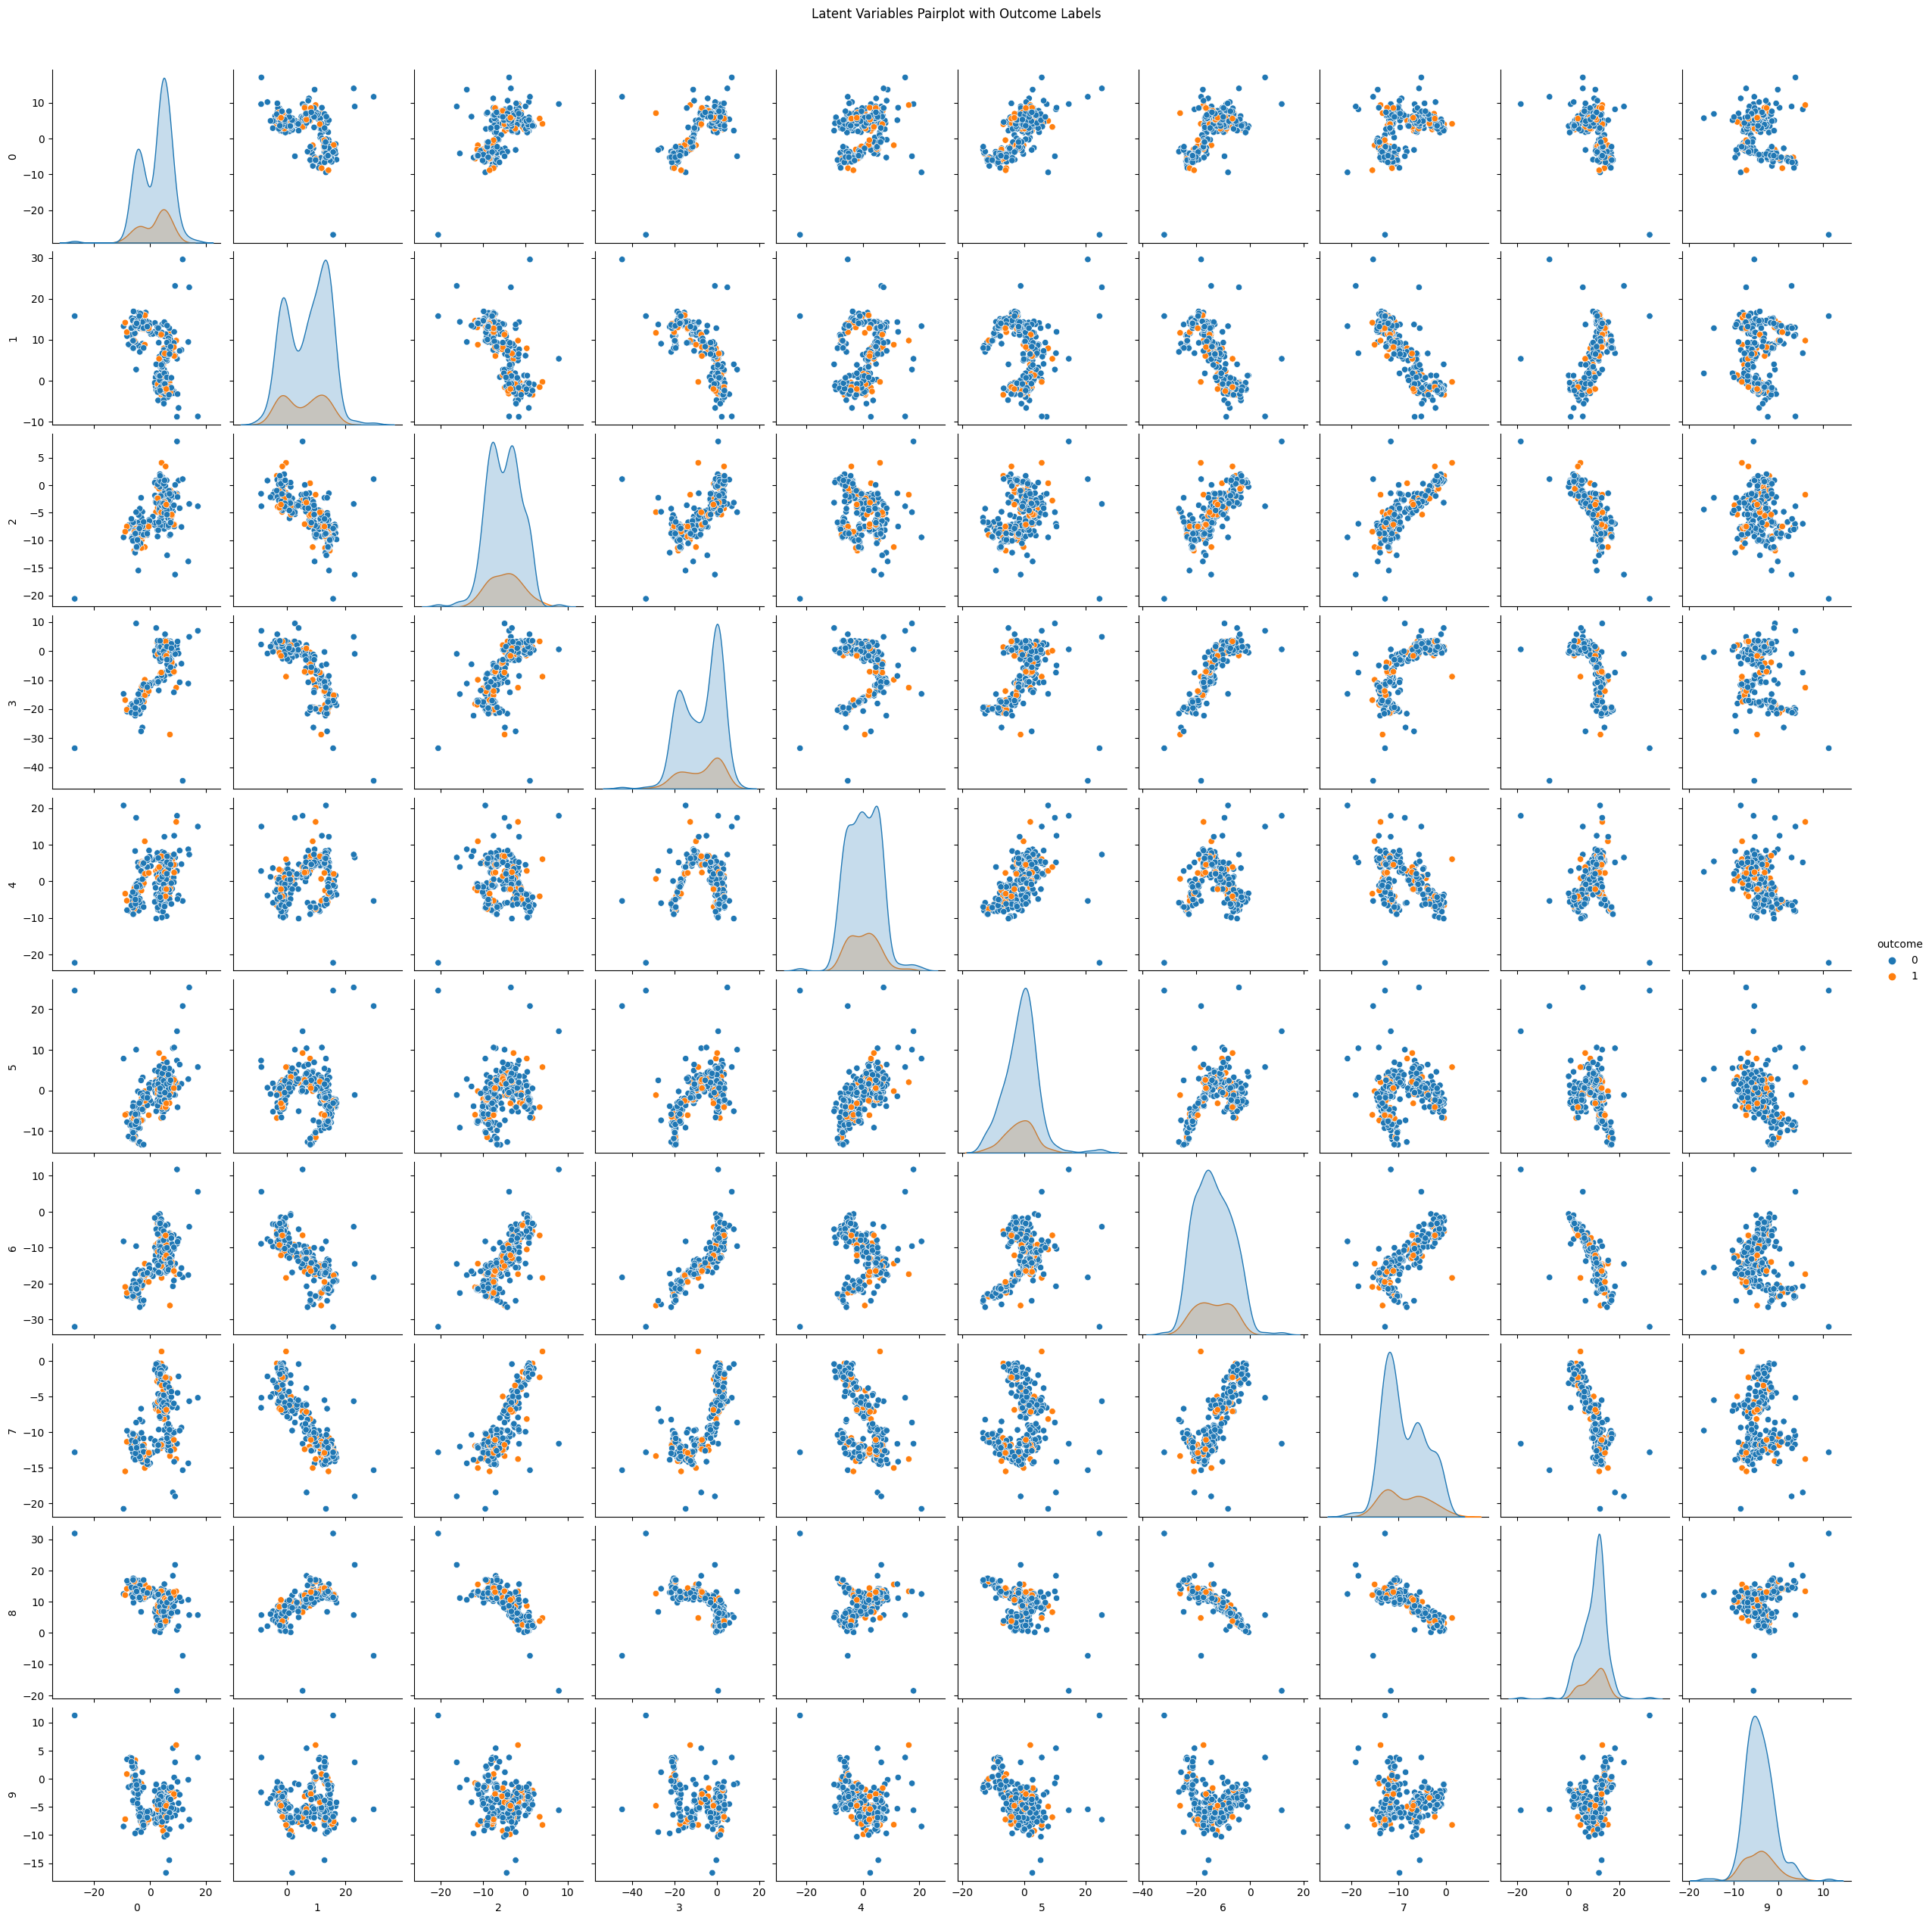

In [31]:
# 将潜在变量转换为 DataFrame 并配对 outcome
latent_variables_df = pd.DataFrame(latent_variables.numpy())
latent_variables_df['outcome'] = outcome_list  # 将 outcome 与潜在变量进行配对

# 可视化潜在变量和 outcome 的分布
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(latent_variables_df, hue='outcome')
plt.suptitle('Latent Variables Pairplot with Outcome Labels', y=1.02)
plt.show()

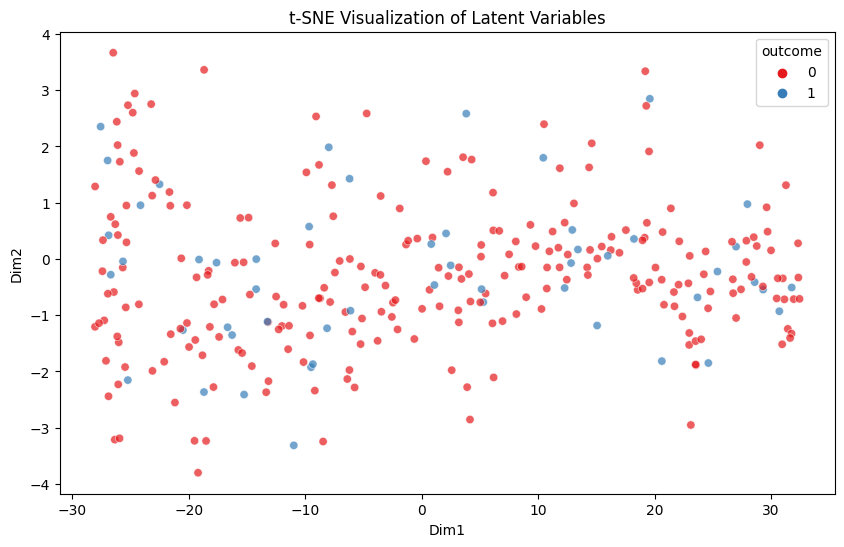

In [35]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# 首先，我们使用 t-SNE 或 PCA 将潜在变量降到2维
# 选择降维算法：t-SNE 或 PCA

# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=42)
latent_variables_2d_tsne = tsne.fit_transform(latent_variables)

# 或者你可以使用 PCA 进行降维
# pca = PCA(n_components=2)
# latent_variables_2d_pca = pca.fit_transform(latent_variables)

# 将降维后的数据转换为 DataFrame
latent_variables_df_2d = pd.DataFrame(latent_variables_2d_tsne, columns=['Dim1', 'Dim2'])
latent_variables_df_2d['outcome'] = outcome_list  # 将 outcome 加入 DataFrame

# 使用 seaborn 进行可视化
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim1', y='Dim2', hue='outcome', data=latent_variables_df_2d, palette='Set1', alpha=0.7)
plt.title('t-SNE Visualization of Latent Variables')
plt.show()